Loaded as API: https://black-forest-labs-flux-1-kontext-dev.hf.space ✔


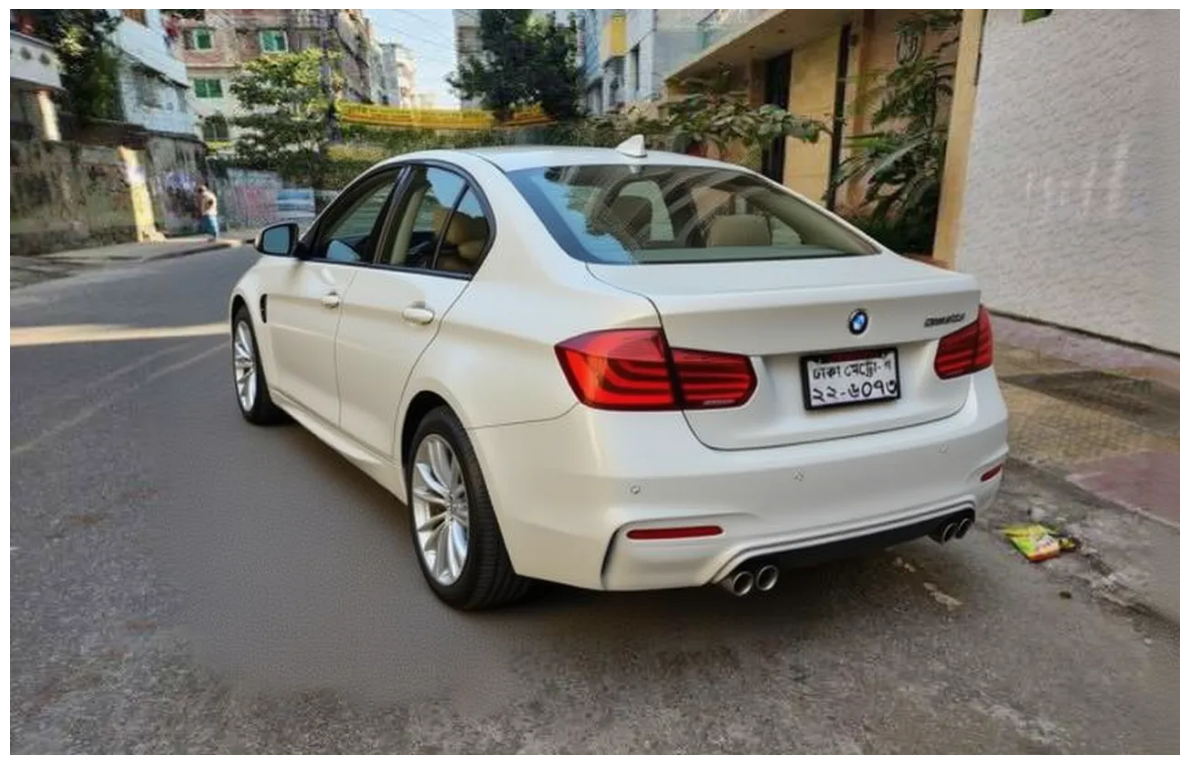

Saved: flux_result_724950680.png
Result: C:\Users\user\AppData\Local\Temp\gradio\459d9bc207b3e4f0297f3e1b36179d1aee845ff874cca7cc2e27a1fc7ff92f0e\image.webp
Seed: 724950680


In [3]:
# Improved FLUX.1-Kontext-Dev Client
# !pip install gradio_client pillow matplotlib requests

import os
import requests
from PIL import Image
import matplotlib.pyplot as plt
from gradio_client import Client, handle_file
from io import BytesIO
import time

def generate_with_flux(image_path, prompt, guidance=7.5, steps=28, seed=None, hf_token=None):
    # Initialize client with token if provided
    if hf_token:
        client = Client("black-forest-labs/FLUX.1-Kontext-Dev", hf_token=hf_token)
    else:
        client = Client("black-forest-labs/FLUX.1-Kontext-Dev")
    
    randomize = seed is None
    if seed is None:
        seed = int(time.time())  # Better random seed
    
    try:
        result = client.predict(
            input_image=handle_file(image_path),
            prompt=prompt,
            seed=seed,
            randomize_seed=randomize,
            guidance_scale=guidance,
            steps=steps,
            api_name="/infer"
        )
        
        # Extract results
        if isinstance(result, tuple) and len(result) >= 2:
            image_result = result[0]
            used_seed = result[1]
        else:
            image_result = result
            used_seed = seed
        
        # Get image path
        if hasattr(image_result, 'get'):
            image_path = image_result.get('path') or image_result.get('url')
        else:
            image_path = str(image_result)
        
        # Load and display high quality image
        if image_path:
            try:
                if image_path.startswith('http'):
                    response = requests.get(image_path)
                    img = Image.open(BytesIO(response.content))
                else:
                    img = Image.open(image_path)
                
                # Display without compression
                plt.figure(figsize=(12, 12), dpi=100)
                plt.imshow(img)
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
                # Save high quality version
                save_path = f"flux_result_{used_seed}.png"
                img.save(save_path, "PNG", quality=100)
                print(f"Saved: {save_path}")
                
                return image_path, used_seed
                
            except Exception as e:
                print(f"Display error: {e}")
                return image_path, used_seed
        
        return None, used_seed
        
    except Exception as e:
        print(f"Generation error: {e}")
        return None, None

# Set your Hugging Face token here (optional but recommended for better access)
HF_TOKEN = None  # Replace with "hf_your_token_here" if you have one

# Generate image
result, seed = generate_with_flux(
    image_path=r"d:\front.png",
    prompt="convert to rear side image of the model, rotate 90",
    guidance=2.5,  # Higher for better prompt adherence
    steps=30,       # More steps for better quality
    hf_token="hf_VTFvxHdgfdsgdgdfgfgdfg"
)

print(f"Result: {result}")
print(f"Seed: {seed}")

# Alternative: Direct API approach for even better quality
def flux_direct_api(image_path, prompt, hf_token=None):
    """Direct API call - sometimes gives better results"""
    
    headers = {}
    if hf_token:
        headers["Authorization"] = f"Bearer {hf_token}"
    
    # This is a placeholder for direct API approach
    # You would need the actual API endpoint URL
    print("For best quality, use the web interface directly or get API access")
    print("Gradio client sometimes compresses images")